In [49]:
import pandas as pd 
import matplotlib.pyplot as plt
import dataframe_image as df_image 
import numpy as np
import sqlalchemy
import seaborn as sns

**Criando a conexão com o banco de dados**

In [31]:
str_contetion = 'sqlite:///cardio.db'
conection  = sqlalchemy.create_engine( str_contetion , echo=True)

**Seprando as querys com pandas**

In [ ]:
sql_query = pd.read_sql_query(
    """
        SELECT *
        
        FROM tb_cardio
    """,
    conection
    
)

**Data Frame**

Mudando os indices da tabela de dados para a melhora da informação


In [41]:
df = pd.DataFrame( sql_query )
df.head()

,indice,Produto,Idade,Genero,Educacao,Estado-civil,Uso,Ginastica,Renda,Milhas
0,0,TM195,18,Male,14,Single,3,4,29562,112
1,1,TM195,19,Male,15,Single,2,3,31836,75
2,2,TM195,19,Female,14,Partnered,4,3,30699,66
3,3,TM195,19,Male,12,Single,3,3,32973,85
4,4,TM195,20,Male,13,Partnered,4,2,35247,47


In [40]:
new_data = df.rename( columns={'index': 'indice',
                               'Product': 'Produto',
                               'Age': 'Idade',
                               'Gender': 'Genero',
                               'Education': 'Educacao',
                               'MaritalStatus': 'Estado-civil',
                               'Usage': 'Uso',
                               'Fitness': 'Ginastica',
                               'Income': 'Renda',
                               'Miles': 'Milhas'}, inplace=True)

In [42]:
# gerando a imagem para o relatorio
df_image.export(df.describe().T,  'descrição.png')

**Raspagem de dados únicos dentro do dataframe**<br>
unique para vê os dados únicos <br>
nunique para a contagem desses dados <br>

In [ ]:
def nunique(i):
    print('{}'.format(i)) # formatnado o sistema em string
    print(df[i].unique()) # unicos do data frame 
    print(df[i].nunique()) 


for i in df.select_dtypes( include='number' ):
    nunique(i)

**Coloração do dataframe**

<AxesSubplot: >

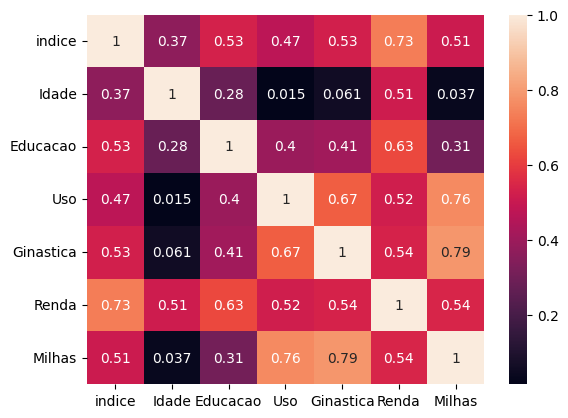

In [52]:
sns.heatmap( df.select_dtypes( include='number' ).corr() , annot=True )

**Fazendo a comparação com histograma**

In [ ]:
def comparacao(j):
    sns.histplot( y = df[j] )
    plt.show()
    
    
for j in df.columns:
    comparacao(j)